In [1]:
%matplotlib widget

In [132]:
%load_ext autoreload
%autoreload 2

from sage.all import *
from utility import *

Pi = sage.symbolic.constants.pi



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

X = x^2+y^2-z^2 - 9
X = X.expand()

print(X)

x^2 + y^2 - z^2 - 9


# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C has the following charts:
BranchChart(branch_value=y == 3/2*x^2 - 1/2*t, equation=9/4*x^4 - 3/2*t*x^2 + 1/4*t^2 + x^2 - z^2 - 9)
The model fibre over 0 has the following charts:
BranchChart(branch_value=y == 3/2*x^2, equation=9/4*x^4 + x^2 - z^2 - 9)
Critical values: 3 
Critical points: 4
{x: 0.000000000000000, y: -3.00000000000000, z: 0.000000000000000}
{x: 0.000000000000000, y: 3.00000000000000, z: 0.000000000000000}
{x: -2.98142396999972, y: -0.333333333333333, z: 0.000000000000000}
{x: 2.98142396999972, y: -0.333333333333333, z: 0.000000000000000}


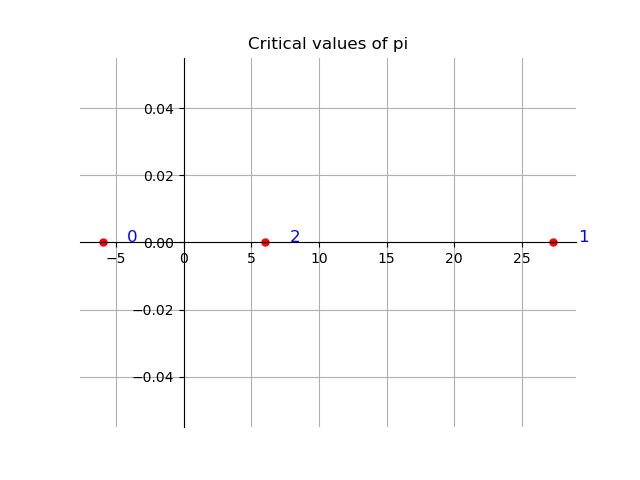

In [154]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = 3*x^2 - 2*y



pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = 0
solvefor=y

t = var('t', domain=CC)

t_charts = pi.fibre(t, solvefor)

print(f'The fibre over t in C has the following charts:')
for chart in t_charts:
    print(chart)
# print(f'The model fibre over {origin_fibre} is {t_fibre.simplify().subs({t:origin_fibre})==0}')
print(f'The model fibre over {origin_fibre} has the following charts:')
for chart in t_charts:
    print(BranchChart(chart.branch_value.subs(t==origin_fibre), chart.chart_equation.subs(t==origin_fibre)))

crit_points_pi = pi.critical_locus()
crit_values_pi = pi.critical_values(origin_fibre=origin_fibre)

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

for pt in crit_points_pi:
    print(pt)


In [126]:
fibbi = pi.fibre(1, y)
for fib in fibbi:
    print(fib)

BranchChart(branch_value=y == -sqrt(-x^3 - z + 1), equation=-x^3 + x^2 - z^2 - z - 8)
BranchChart(branch_value=y == sqrt(-x^3 - z + 1), equation=-x^3 + x^2 - z^2 - z - 8)


In [127]:
for valu in pi.critical_locus():

    print(valu)

{x: 0.000000000000000, y: 0.000000000000000, z: -3.00000000000000*I}
{x: 0.000000000000000, y: 0.000000000000000, z: 3.00000000000000*I}
{x: -3.00205409515334, y: 0.000000000000000, z: 0.111035085567406}
{x: 3.00205409515334, y: 0.000000000000000, z: -0.111035085567406}
{x: -6.79893810665885e-18 - 0.111035085567407*I, y: 0.000000000000000, z: 1.83822796924836e-16 - 3.00205409515333*I}
{x: 6.79893810665885e-18 + 0.111035085567407*I, y: 0.000000000000000, z: -1.83822796924836e-16 + 3.00205409515333*I}
{x: 0.000000000000000, y: -3.04138126514911, z: -0.500000000000000}
{x: 0.000000000000000, y: 3.04138126514911, z: -0.500000000000000}
{x: 0.666666666666667, y: -2.96741563579414, z: -0.500000000000000}
{x: 0.666666666666667, y: 2.96741563579414, z: -0.500000000000000}


In [128]:
for valu in pi.critical_values():
    print(valu)

(-26.94446346600182+0j)
-3j
(1.840742649698856e-16-3.000685166875535j)
(8.749999999999998+0j)
(8.601851851851851+0j)
(26.94446346600182+0j)
(-1.840742649698856e-16+3.000685166875535j)
3j


### Criticality at Infinity

In [54]:
print(intersection_summary(pi))
intersection = intersection_at_infinity(pi)

for point in intersection:
    print(kernels(pi, point))
    print(point)

The hyperplane at infinity is given by 1.00000000000000*x^2 + 1.00000000000000*y^2 - 1.00000000000000*z^2 == 0.
The fibration vanishes at [1.00000000000000*x^3 == 0].
Their intersection consists of [{x: 0, y: 1, z: -1, w: 0}, {x: 0, y: 1, z: 1, w: 0}].
None
Vector space of degree 4 and dimension 2 over Symbolic Ring
Basis matrix:
[                1                 0                 0                 0]
[                0  1.00000000000000 -1.00000000000000                 0]
{x: 0, y: 1, z: -1, w: 0}
Vector space of degree 4 and dimension 2 over Symbolic Ring
Basis matrix:
[               1                0                0                0]
[               0 1.00000000000000 1.00000000000000                0]
{x: 0, y: 1, z: 1, w: 0}


## The fibration $\rho$

In [145]:
ar = var('ar', domain=CC)
br = var('br', domain=CC)

rho = ar*x + br*z

# rho = rho.subs({ar: 3*e^(2*Pi*I*-0.05).n(), br: 8*e^(2*I*Pi*0.08).n()})

rho = rho.subs({ar: -1, br: 3})
origin_fibre_rho = 0

# rho_t = rho.subs(solvefor == t_charts)

rho_t_charts = [
    BranchChart(chart.branch_value, rho.subs(solvefor == chart.chart_equation)) for chart in t_charts
]

rho_0_charts = [BranchChart(chart.branch_value, chart.chart_equation.subs(t==origin_fibre)) for chart in rho_t_charts]

rho = LefschetzFibration([x,y], t_charts.subs(t==origin_fibre), rho_0)

print(rho.domain)
print(rho.mapping)

crit_points_rho = rho.critical_locus()

for pt in crit_points_rho:
    print(pt)
crit_values_rho = sort_by_angle(rho.critical_values())

# Somehow crit values is bugging out

# a = var('a', domain=CC)
# constraints = [rho.domain==0]
# gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
# a_solved = solve(gradient_constraints[0], a)[0]
# b = gradient_constraints[0]
# gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
# constraints.extend(gradient_constraints)
# print(constraints)

# crit_points_rho = solve(constraints, rho.variables)
# crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
# crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

# print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre_rho, title="Critical values of rho")


AttributeError: 'list' object has no attribute 'subs'

### Vanishing Cycles of Rho

#### Origin Fibre

6409/10000*y^2 - 5
[-2.79312175+0.j  2.79312175+0.j]


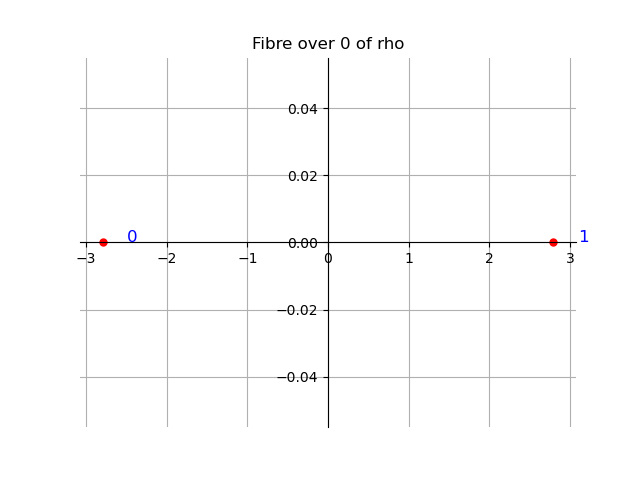

In [ ]:
solvefor_rho = x

t_fibre_rho = rho.fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)
print(sols)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


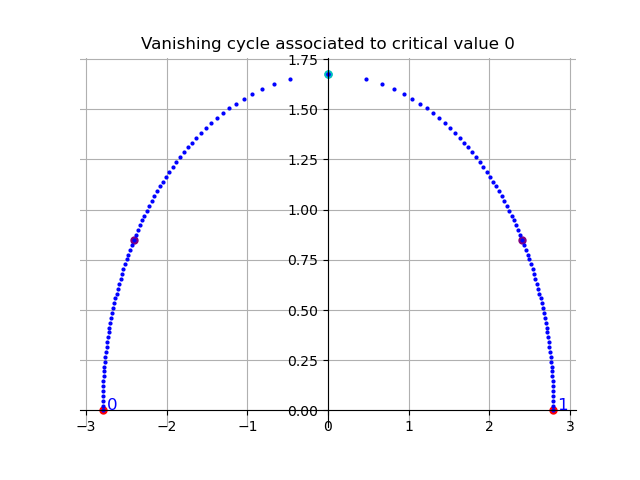

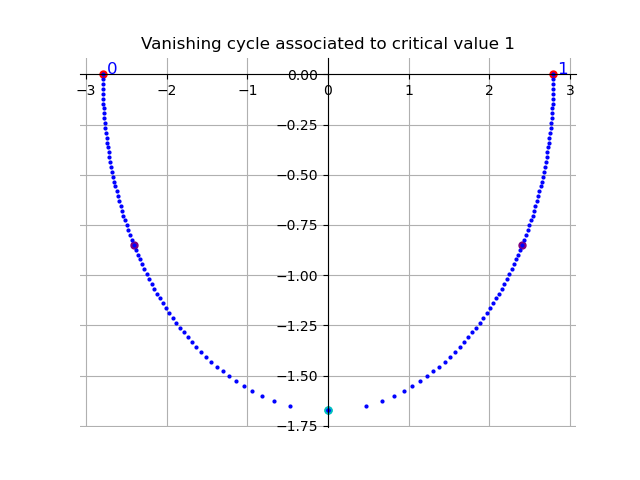

In [9]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

In [10]:
path = pl_path([origin_fibre_rho, 4*I+4 , -3*I+4, crit_values_rho[2]])
trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Checking sheet of matching cycle')    

IndexError: list index out of range

In [ ]:
path = pl_path([origin_fibre_rho, 4*I+4 , 4*I, 2*I-3, crit_values_rho[0]])
trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Checking sheet of matching cycle')    

## Matching Paths - Images of Vanishing Cycles

In [11]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

Graphics3d Object

## Additional matching paths from different choices of Vanishing Paths

In [19]:
p0 = pl_path([origin_fibre, 15*I, 15*I-10, crit_values_pi[0]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[0], solvefor=solvefor, path=p0)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

dict_keys([0.0, 0.004784688995215311, 0.009569377990430622, 0.014354066985645933, 0.019138755980861243, 0.023923444976076555, 0.028708133971291867, 0.03349282296650718, 0.03827751196172249, 0.0430622009569378, 0.04784688995215311, 0.05263157894736842, 0.05741626794258373, 0.06220095693779904, 0.06698564593301436, 0.07177033492822966, 0.07655502392344497, 0.08133971291866028, 0.0861244019138756, 0.09090909090909091, 0.09569377990430622, 0.10047846889952153, 0.10526315789473684, 0.11004784688995216, 0.11483253588516747, 0.11961722488038277, 0.12440191387559808, 0.1291866028708134, 0.1339712918660287, 0.13875598086124402, 0.14354066985645933, 0.14832535885167464, 0.15311004784688995, 0.15789473684210525, 0.16267942583732056, 0.1674641148325359, 0.1722488038277512, 0.17703349282296652, 0.18181818181818182, 0.18660287081339713, 0.19138755980861244, 0.19617224880382775, 0.20095693779904306, 0.20574162679425836, 0.21052631578947367, 0.215311004784689, 0.22009569377990432, 0.22488038277511962,

Graphics3d Object

In [21]:
p1 = pl_path([origin_fibre, -9-15*I, crit_values_pi[5]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[5], solvefor=solvefor, path=p1)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

In [22]:
p2 = pl_path([origin_fibre, 7+10*I, 7-15*I, crit_values_pi[1]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[1], solvefor=solvefor, path=p2)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

In [25]:
p3 = pl_path([origin_fibre,20*I, 20*I+10, crit_values_pi[3]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[3], solvefor=solvefor, path=p3)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

In [ ]:
p4 = pl_path([origin_fibre, -8,-8-15*I, 7-15*I, crit_values_pi[1]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[1], solvefor=solvefor, path=p3)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)